In [1]:
from utils import set_working_directory_up_two_levels
set_working_directory_up_two_levels()

In [30]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import itertools
import glob
import os

from tqdm import tqdm
from presentation.pipelines.steps.model_design import load_pt_model, build_classifier 
from src.plot.clf_weights import plot_gamma_weights
from src.plot.general import save_plot

pd.options.mode.chained_assignment = None  # default='warn'
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # GPU number -1 off by default

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
results_directory = './presentation/results/v2/'

# Experiments params (don't touch!)
n_classes = {'alcock': 6, 'atlas': 5}
datasets = ['alcock', 'atlas']
spc_list = [20, 100, 500]
folds = range(3)

In [20]:
combinations = list(itertools.product(datasets, spc_list, folds))
results = {ds: {spc: [] for spc in spc_list} for ds in datasets}

for ds_name, spc, fold_n in tqdm(combinations, desc="Processing models"):    
    ft_case = '{}/fold_{}/{}_{}'.format(ds_name, fold_n, ds_name, spc)
    curr = os.path.join(results_directory, 'classification', ft_case, 'skip_avg_mlp')
    astromer, model_config = load_pt_model(os.path.join(results_directory, 'finetuning', ft_case))

    model = build_classifier(astromer, 
                            model_config, 
                            False, 
                            n_classes[ds_name],
                            arch='skip_avg_mlp',
                            verbose=0)

    model.load_weights(os.path.join(curr, 'weights'))
    gamma_values = model.get_layer('gamma_weight').gamma.numpy()
    results[ds_name][spc].append(gamma_values)       
    

Procesando modelos:   0%|          | 0/18 [00:00<?, ?it/s]

Procesando modelos: 100%|██████████| 18/18 [01:59<00:00,  6.67s/it]


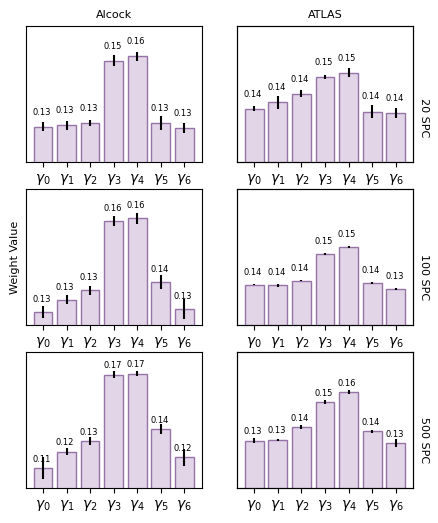

In [32]:
fig, axes = plt.subplots(3, 2, figsize=(5, 6))
fig, axes = plot_gamma_weights(results, fig=fig, axes=axes)

In [33]:
save_plot(fig, './presentation/figures/classification/gamma_weights.pdf')

Plot saved successfully at: ./presentation/figures/classification/gamma_weights.pdf
